w[0]: 0.393906  b: -0.031804


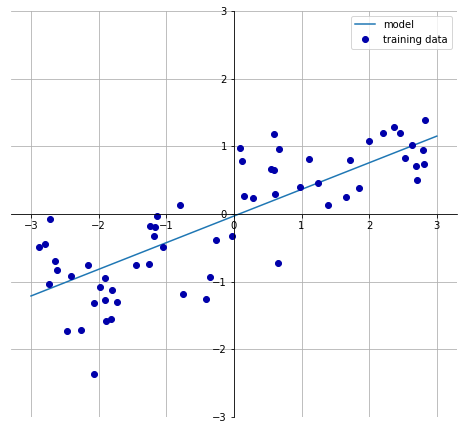

In [2]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mglearn.plots.plot_linear_regression_wave()

#wave 데이터에 linear regression 사용했을 떄

In [11]:
# 웨이브 -> linear regression 사용해 train 부터 test 까지 성능 비교

from sklearn.linear_model import LinearRegression
x, y = mglearn.datasets.make_wave(n_samples=60)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

lr = LinearRegression().fit(x_train, y_train)

print("lr.coef_ : {}".format(lr.coef_)) # w : corf_에 저장됨  기울기  - 넘파이 배열
print("lr.intercept_ : {}".format(lr.intercept_)) # b :intercept_에 저장됨 절편  - 상수값 하나
print("train score : {:.2f}".format(lr.score(x_train, y_train)))
print("test score : {:.2f}".format(lr.score(x_test,y_test)))

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746
train score : 0.67
test score : 0.66


In [10]:
#linaer regression 보스턴 데이터 사용하기
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #선형 모델

x,y = mglearn.datasets.load_extended_boston()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression().fit(x_train, y_train)


print("train : {:.2f}".format(lr.score(x_train,y_train)))
print("test : {:.2f}".format(lr.score(x_test,y_test)))

#train > test : overfitting

train : 0.95
test : 0.61


In [11]:
#릿지회귀
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge # 릿지  모델

x,y = mglearn.datasets.load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

ridge = Ridge().fit(x_train, y_train)
print("train set score : {:.2f}".format(ridge.score(x_train,y_train)))
print("test set score : {:.2f}".format(ridge.score(x_test,y_test)))

#ridge 썼을 때 선형 회귀보다 train 점수는 낮고 test는 더 높다 -> overfitting은 줄이요 일반화가 더 잘 됐다.

train set score : 0.89
test set score : 0.75


train set score : 0.79
test set score : 0.64
train set score : 0.93
test set score : 0.77
1.0
10.0
100.0


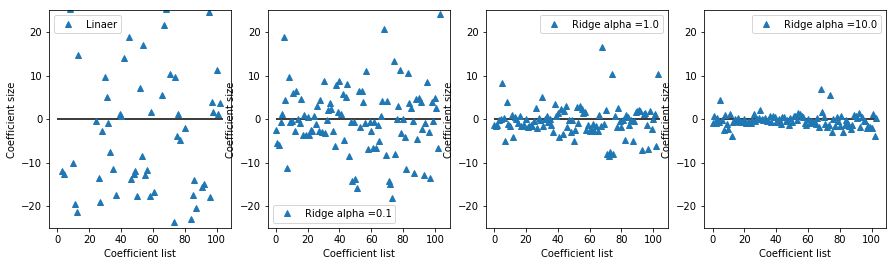

In [42]:
#ridge함수의 alpha 조절하기
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge # 릿지  모델

x,y = mglearn.datasets.load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

ridge10 = Ridge(alpha=10).fit(x_train, y_train)
print("train set score : {:.2f}".format(ridge10.score(x_train,y_train)))
print("test set score : {:.2f}".format(ridge10.score(x_test,y_test)))

#alpha값을 늘리면 계수를 0으로 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화는 더 잘됨 (alpha가 클수록 더 제한된 형태)
ridge01 = Ridge(alpha=0.1).fit(x_train,y_train)
print("train set score : {:.2f}".format(ridge01.score(x_train,y_train)))
print("test set score : {:.2f}".format(ridge01.score(x_test,y_test)))

#alpha값을 크게 해준뒤 점점 줄여가며 테스트 해볼것!
fig, axes = plt.subplots(1,4,figsize=(15,4)) #subplots(열로 배열할 그림수, 행으로 배열 할 그림수, figsize = 그림크기 (x,y))
lr = LinearRegression().fit(x_train, y_train)

list = [lr.coef_,ridge01.coef_,ridge.coef_,ridge10.coef_]
j =0.01
for i, ax in zip(list,axes):
    if j ==0.01:
        ax.plot(i,"^",label = "Linaer")
        j *=10
    else:
        ax.plot(i,"^", label = "Ridge alpha ="+str(j))
        j *=10
        print(j)
    ax.set_xlabel("Coefficient list")#계수 목록
    ax.set_ylabel("Coefficient size")#계수 크기
    ax.hlines(0,0,len(lr.coef_))
    ax.set_ylim(-25,25)

    ax.legend()

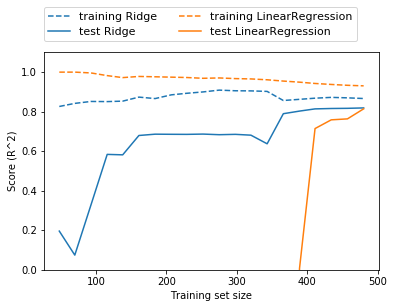

In [46]:
#ridge함수의 alpha 조절하기
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge # 릿지  모델

#보스턴 주택가격 데이터셋에 대한 릿지 회귀와 선형 회귀의 학습 곡선
mglearn.plots.plot_ridge_n_samples()
